<a href="https://colab.research.google.com/github/LazaroR-u/Quantum_Computing/blob/main/F_CNF_QML_FeQ02_16_875_18_625.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementacion de redes neuronales cuanticas a rayos cosmicos

# carga y lectura de datos csv

Empezamos leyendo el archivo csv previamente guardado y creamos una objeto con los datos del df normalizados

In [ ]:
#import uproot
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
from keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau#, NanChecker
from keras.models import Sequential, Model
from keras.layers import *
from tensorflow.keras.optimizers import Adam,SGD
#from keras.optimizers import Adam, SGD

import os
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('FeQ02-16.875-18.625_shower_clean.csv', sep="\t",header=0)

#df = df.drop(df["Unnamed: 0"], inplace = True)
from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()
# fit and transform in one step

df=df.drop(columns="Unnamed: 0")
df = df.dropna()
df.head()

,lgE,zenith,Seed2,Seed3,Xfirst,Hfirst,XfirstIn,X0,Xmax,Nmax,p1,p2,p3,chi2,Xmx,Nmx,XmxdEdX
0,17.018965,62.145683,2,0,4.666200,42357.080,0.803571,-24.843546,570.23920,57784590.0,92.592186,-0.067881,0.000046,0.352232,566.54236,57520660.0,563.67830
1,17.024315,32.893510,12192693,0,4.596425,38126.535,0.892857,-33.289776,561.58777,58243696.0,91.286370,-0.056130,0.000040,0.228154,559.05220,58175090.0,556.06433
2,17.000030,42.873140,24837462,0,4.191171,39867.133,0.607143,-49.232376,594.11460,54536708.0,81.818665,-0.044783,0.000034,0.043274,593.68340,54552532.0,590.70110
3,17.028786,55.115772,34284918,0,5.855533,39122.420,0.285714,-19.989582,617.66125,59091640.0,84.353010,-0.051793,0.000037,0.575614,613.00460,58692292.0,609.88086
4,16.949389,49.235756,43039435,0,14.610561,31658.965,0.535714,-27.789558,569.54095,48750524.0,87.379280,-0.052736,0.000040,0.183219,567.37070,48774410.0,563.69790


In [ ]:
df.shape

(23691, 17)

<Axes: >

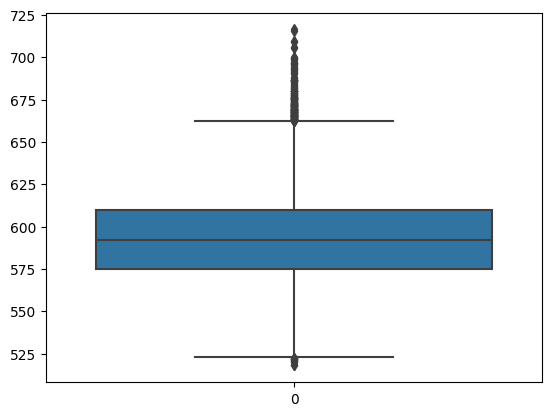

In [ ]:
sns.boxplot(df["Xmax"])

<Axes: >

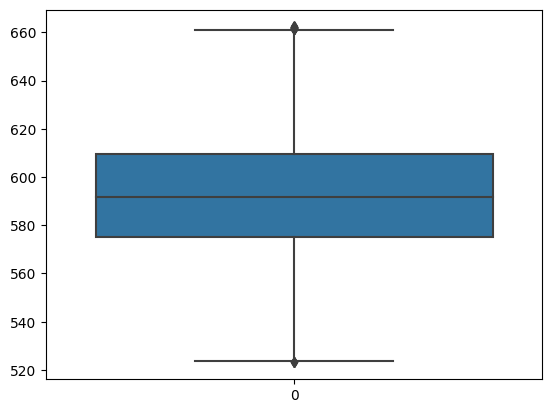

In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' y quieres eliminar los outliers de la columna 'column_name'
# Calcula los percentiles 25 y 75 para la columna 'column_name'
Q1 = df['Xmax'].quantile(0.25)
Q3 = df['Xmax'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Define los límites inferior y superior para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra el DataFrame para eliminar los outliers
df_conc = df[(df['Xmax'] >= lower_bound) & (df['Xmax'] <= upper_bound)]
sns.boxplot(df_conc["Xmax"])

### PCA

In [ ]:
X=df_conc.drop(columns=["Xmax", "Seed2", "Seed3"])
X

,lgE,zenith,Xfirst,Hfirst,XfirstIn,X0,Nmax,p1,p2,p3,chi2,Xmx,Nmx,XmxdEdX
0,17.018965,62.145683,4.666200,42357.080,0.803571,-24.843546,57784590.0,92.592186,-0.067881,0.000046,0.352232,566.54236,57520660.0,563.67830
1,17.024315,32.893510,4.596425,38126.535,0.892857,-33.289776,58243696.0,91.286370,-0.056130,0.000040,0.228154,559.05220,58175090.0,556.06433
2,17.000030,42.873140,4.191171,39867.133,0.607143,-49.232376,54536708.0,81.818665,-0.044783,0.000034,0.043274,593.68340,54552532.0,590.70110
3,17.028786,55.115772,5.855533,39122.420,0.285714,-19.989582,59091640.0,84.353010,-0.051793,0.000037,0.575614,613.00460,58692292.0,609.88086
4,16.949389,49.235756,14.610561,31658.965,0.535714,-27.789558,48750524.0,87.379280,-0.052736,0.000040,0.183219,567.37070,48774410.0,563.69790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23685,17.487488,23.778300,11.514562,31032.623,0.285714,-41.384770,175062260.0,77.665146,-0.033362,0.000026,0.098019,610.45636,174933330.0,607.94150
23686,17.384068,39.932674,4.363041,39205.656,0.035714,0.005855,134994820.0,98.395300,-0.063264,0.000041,0.597912,598.84360,135332420.0,596.06120
23688,17.410105,60.107513,26.579490,29391.781,0.482143,-1.080345,145725040.0,96.244240,-0.074148,0.000045,0.318654,628.64386,145179500.0,626.54800
23689,17.415665,50.658600,0.686728,54887.676,0.625000,-33.303986,143514540.0,92.827920,-0.054109,0.000037,0.297263,582.57630,143581400.0,580.05914


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

X=df_conc.drop(columns=["Xmax", "Seed2", "Seed3"])

scaler.fit(X)
scaled_data=scaler.transform(X)
# Use fit and transform method
pca = PCA(n_components=3)  # project from 14 to 3 dimensions
projected = pca.fit_transform(scaled_data)
projected

array([[-0.50747491,  0.39810974, -0.09328094],
       [-0.49776377,  0.21815774,  0.03636846],
       [-0.35501755, -0.22586976, -0.13526707],
       ...,
       [ 0.48416062,  0.19531141,  0.49838758],
       [ 0.30611796,  0.3666638 , -0.46287904],
       [ 0.47776858,  0.58514506,  0.04900691]])

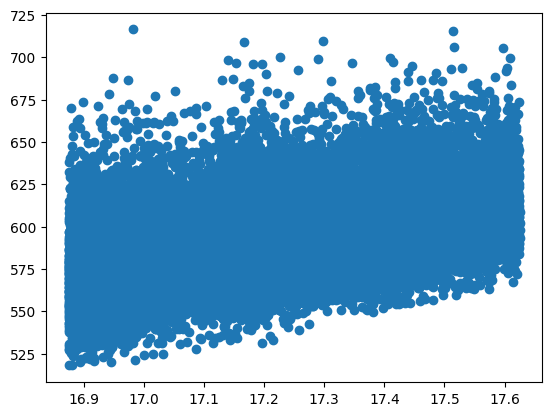

In [ ]:
plt.scatter(df["lgE"], df["Xmax"])
plt.show()

<Axes: >

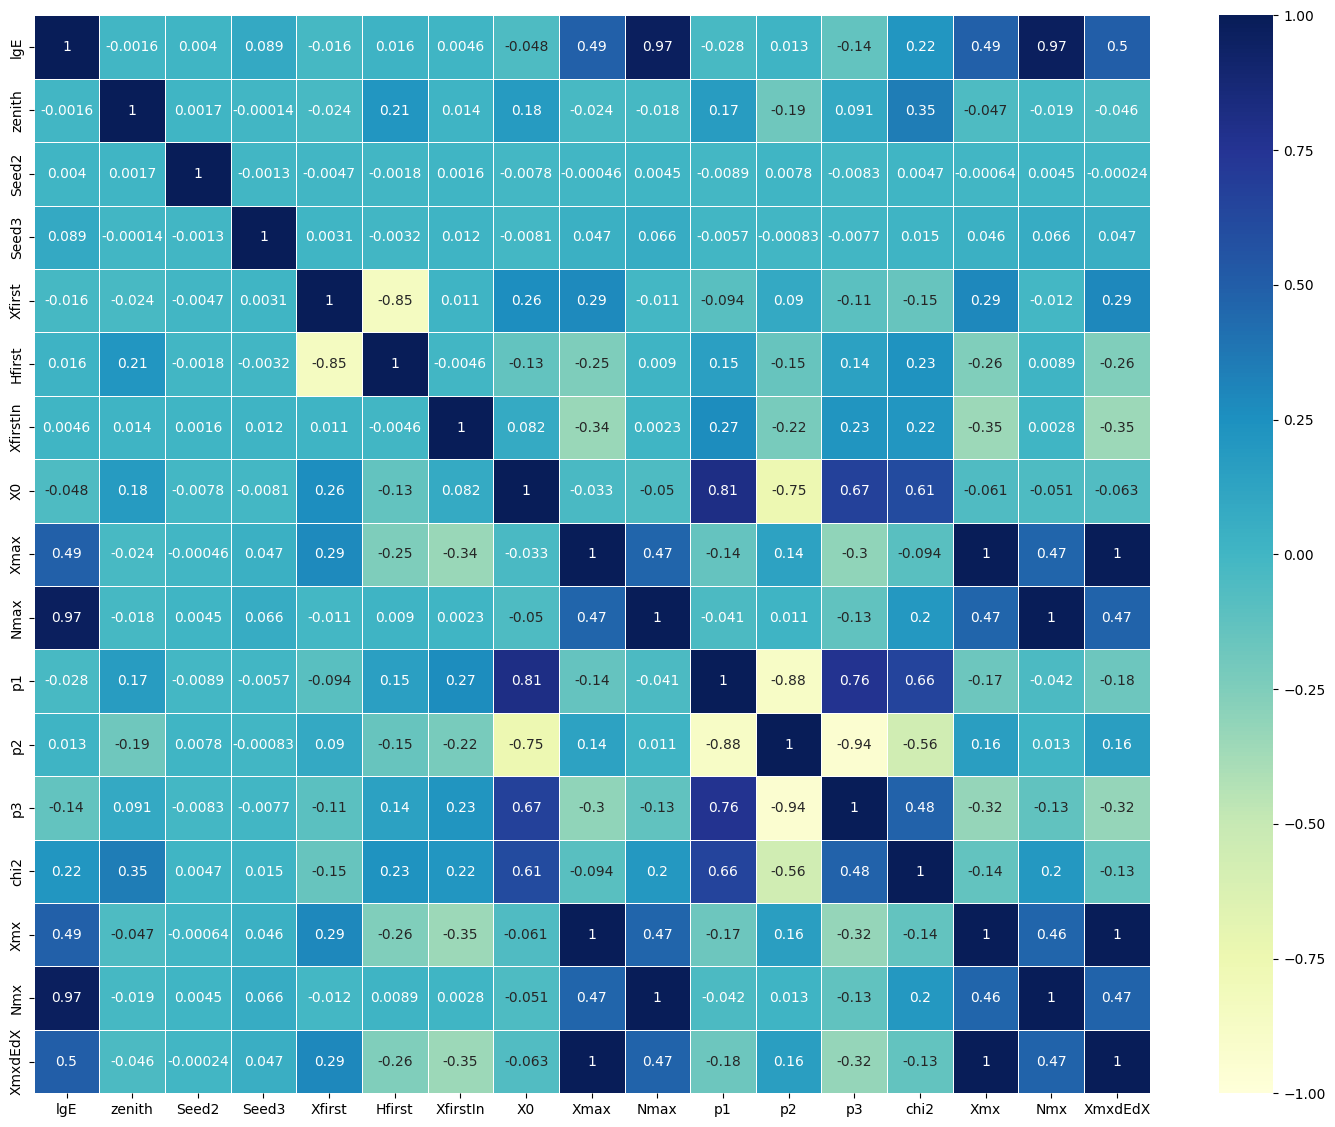

In [ ]:
plt.figure(figsize=(18, 14))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)

Definimos las variables predictors y target


predictors_10 = lgE, Xfirst, Hfirst, Xfirstin, Nmax, p1,p2,p3, chi2, Nmx

predictors_6 = lgE, Nmax, Xfirst, Hfirst, Xfirstin, p3

predictors_3 = lgE, Nmax, p3

Target = Xmax

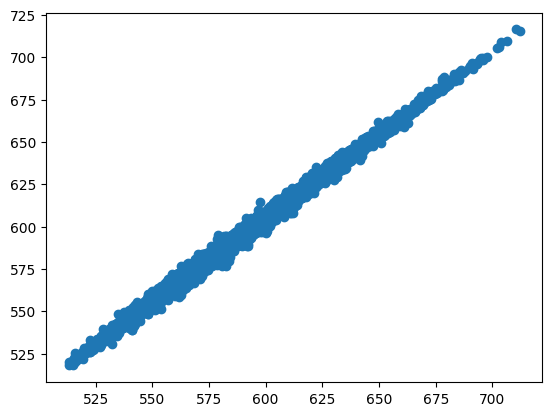

In [ ]:
plt.scatter(df["XmxdEdX"], df["Xmax"])

Dado que la grafica de dispersion de Xmax con xmxdEdX y Xmx tiene una variable de correlacion igual a 1, no los vamos a considerar como nuestras variables predictoras. Esto porque son las mismas columnas, contienen los mismos valores que Xmax.

# Modelos de Quantum Machine learning

In [ ]:
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 13.3 MB/s eta 0:00:00


In [ ]:
pip install qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512703 sha256=83d5b5611dd204c1021ebf9d8aa1c61ead35279992fb3eb403fc90be189d8ae1
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
pip install qiskit_algorithms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.9/306.9 kB 4.0 MB/s eta 0:00:00


In [ ]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=4e46e4cdb6a6fbe9abbb8d9b82f25002ff76f6c0b4e29306fe06ebe6501c1b4d
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
import qiskit_algorithms
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals
import qiskit_algorithms
#from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from sklearn.model_selection import train_test_split


algorithm_globals.random_seed = 42

<ipython-input-16-692ccd09ae86>:6: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B


In [ ]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.circuit import Parameter
from qiskit.utils import algorithm_globals

from qiskit.algorithms.optimizers import SPSA
from qiskit import QuantumCircuit
from qiskit.utils import QuantumInstance
from qiskit.circuit.library import RYGate

from qiskit_machine_learning.algorithms import VQC
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


## Regresion con EstimatorQNN

cambiamos la forma de las variables predictors y target para que sean arrays de n entradas y 1 dimension

Plan a)
Entrenar un modelo de quantum neural network regressor con 10 columnas como datos predictores, esto corresponde a 10 qubits en el circuito.

----- Falló -------


El entrenamiento falló porque se usó toda la RAM disponible. Es necesario actualizar a Colab pro.


Plan b)
Reducir el numero de columnas a 6 e intentar entrenar el modelo con 6 qubits.

-------------- falló --------
el tiempo de entrenamiento era demasiado.


Plan c)

Reducir el numero de columnas a 3 para tener un modelo con 3 qubits.


Plan d)

Reducir el numero de columnas a 1 para tener un modelo con 1 qubit.

In [ ]:
df_conc.columns

Index(['lgE', 'zenith', 'Seed2', 'Seed3', 'Xfirst', 'Hfirst', 'XfirstIn', 'X0',
       'Xmax', 'Nmax', 'p1', 'p2', 'p3', 'chi2', 'Xmx', 'Nmx', 'XmxdEdX'],
      dtype='object')

In [ ]:
dfc_x10 = np.array(df[["lgE", "Xfirst", "Hfirst", "XfirstIn", "Nmax", "p1","p2","p3", "chi2", "Nmx"]])
dfc_y = np.array(df["Xmax"])
scaler = MinMaxScaler()
dfc_y = scaler.fit_transform(dfc_y.reshape(-1,1))

In [ ]:
x10_train, x10_test, y_train, y_test = train_test_split(dfc_x10, dfc_y, test_size=0.2, random_state=42)


In [ ]:
type(x10_train)

numpy.ndarray

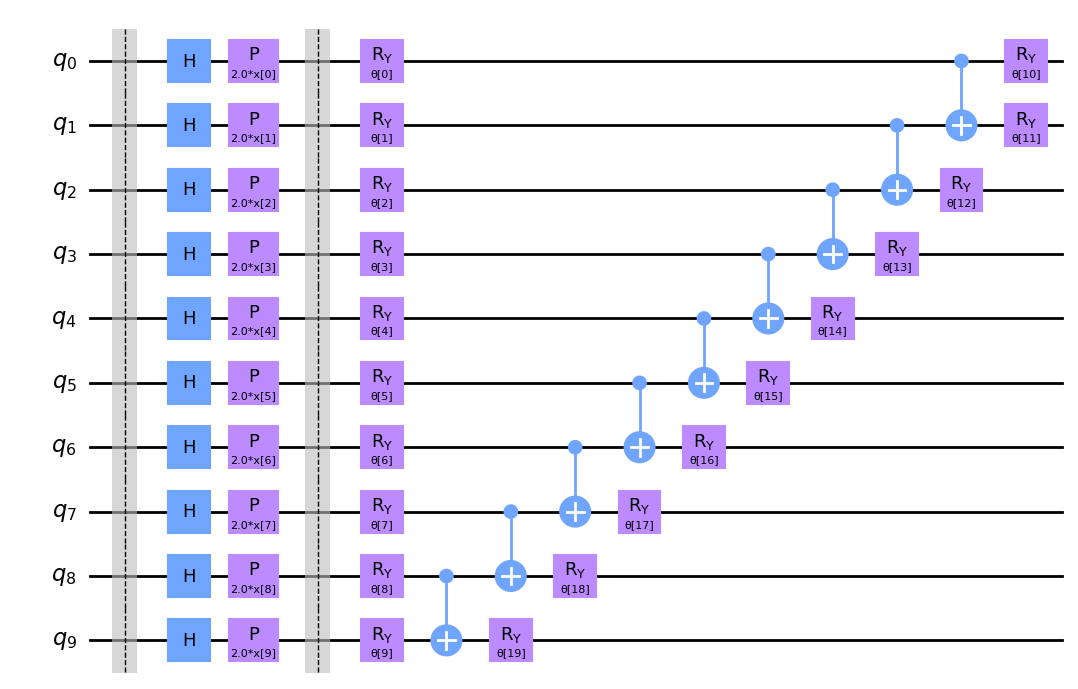

In [ ]:
# MODELO DE QUANTUM CIRCUIT GENERAL
from qiskit import QuantumCircuit
import numpy as np
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit.library import EfficientSU2
from qiskit.circuit.library import ZZFeatureMap,ZFeatureMap

#feature map
num_features = len(x10_train[0])
feature_map = ZFeatureMap(feature_dimension=num_features, reps=1)

#Ansatz o circuito variacional
ansatz = RealAmplitudes(num_qubits=num_features, reps=1)

#unirlo todo en un solo circuito

qc = QuantumCircuit(num_features)
qc.barrier()
qc.compose(feature_map, inplace=True)
qc.barrier()
qc.compose(ansatz, inplace=True)
qc.draw(output="mpl")
qc.draw()
qc.decompose().draw(output = "mpl", fold=20)

In [ ]:
# construct QNN
regression_estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

In [ ]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=1),
    callback=callback_graph,
)

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(x10_train, y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(x10_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
regressor.score(x10_test, y_test)

In [ ]:
regressor.save("regressor_model_QNN_3qbits_He")

## Regresion con Variational Quantum Regressor VQR

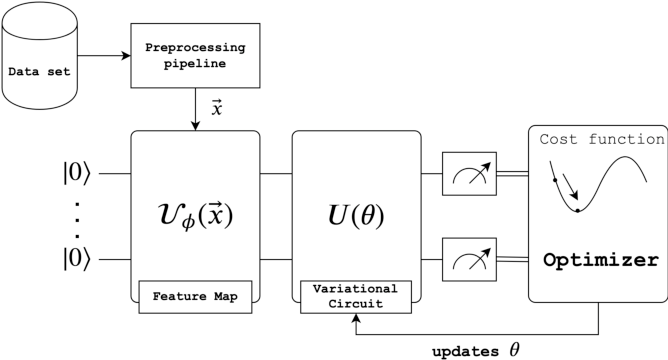

In [ ]:
pip install qiskit


In [ ]:
pip install qiskit_machine_learning

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals
from sklearn.model_selection import train_test_split

#from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 42

In [ ]:
pip install pylatexenc

In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit.library import EfficientSU2

from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.utils import algorithm_globals

#from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister,Aer, execute
import numpy as np

### usando funciones ya definidas

In [ ]:
#feature map
from qiskit.circuit.library import ZZFeatureMap,ZFeatureMap

num_features = 3

feature_map = ZFeatureMap(feature_dimension=num_features, reps=1)

#Ansatz o circuito variacional
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit.library import EfficientSU2

ansatz = RealAmplitudes(num_qubits=num_features, reps=1)

#Circuit

qc = QuantumCircuit(3)
qc.barrier()
qc.compose(feature_map, inplace=True)
qc.barrier()
qc.compose(ansatz, inplace=True)
qc.draw(output="mpl")
qc.decompose().draw(output='mpl')

In [ ]:
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit.algorithms.optimizers import COBYLA,SPSA,SLSQP

from IPython.display import clear_output
import time



objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()




In [ ]:

vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=2),
    callback=callback_graph,
)


In [ ]:
# clear objective value history
objective_func_vals = []

start = time.time()
vqr.fit(X_train, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
vqr.score(X_test, y_test)

In [ ]:
vqr.save("vqr_3qbits_He")

In [ ]:
train_score_vqr = vqr.score(X_train, y_train)
test_score_vqr = vqr.score(X_test, y_test)

print(f"Quantum VQC on the training dataset: {train_score_vqr:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_vqr:.2f}")

# Modelos de QML con menos qubits

En un principio, los modelos anteriores tienen 10 qubits, por lo que su entrenamiento necesita mucho poder de procesamiento. Por lo cual, se sugieren aqui los mismos modelos de QML con una menor cantidad de qubits.



## Regresion con EstimatorQNN


In [ ]:
df_x1 = df["lgE"]
df_y = df["Xmax"]
dfc_x1 = df_conc["lgE"]
dfc_y = df_conc["Xmax"]


In [ ]:
df_x1_train, df_x1_test, df_y_train, df_y_test = train_test_split(df_x1, df_y, test_size = 0.2, random_state= 42)

In [ ]:
dfc_x1_train, dfc_x1_test, dfc_y_train, dfc_y_test = train_test_split(dfc_x1, dfc_y, test_size = 0.2, random_state= 42)

In [ ]:
dfc_x1_train.shape

(18783,)

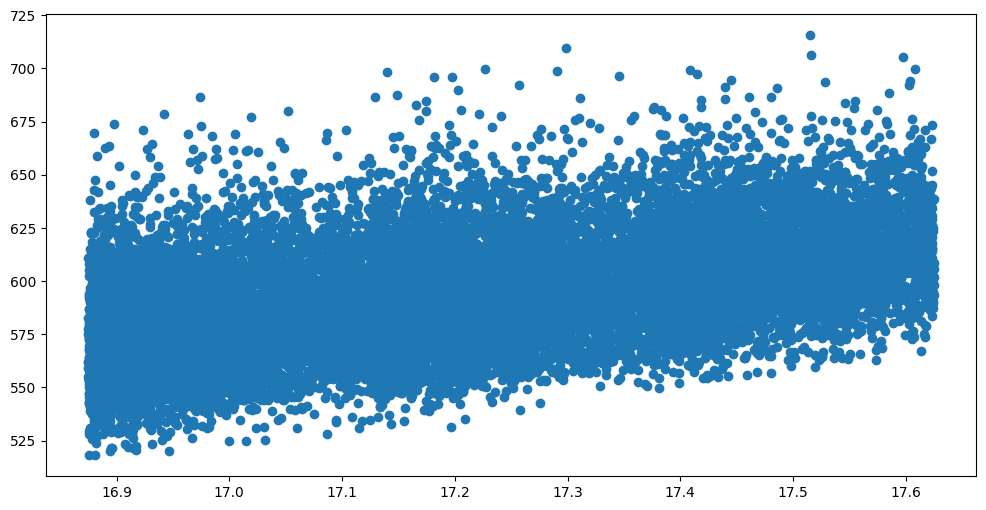

In [ ]:
plt.scatter(df_x1_train,df_y_train)

### Considerando 1 variable y df completo

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#las variables predictoras deben estar en formato array y al tener solo una variable,
#es necesario cambiar las dimensiones a (n,1)
#la variable target debe estar normalizada para poder usar el modelo EstimatorQNN y en formato (-1,1)
df_x1_train = np.array(df_x1_train)
df_x1_train = df_x1_train.reshape(len(df_x1_train), 1)
df_y_train = np.array(df_y_train)

scaler = MinMaxScaler()
df_y_train = scaler.fit_transform(df_y_train.reshape(-1,1))

df_x1_test = np.array(df_x1_test)
df_x1_test = df_x1_test.reshape(len(df_x1_test), 1)
df_y_test = np.array(df_y_test)

scaler = MinMaxScaler()
df_y_test = scaler.fit_transform(df_y_test.reshape(-1,1))

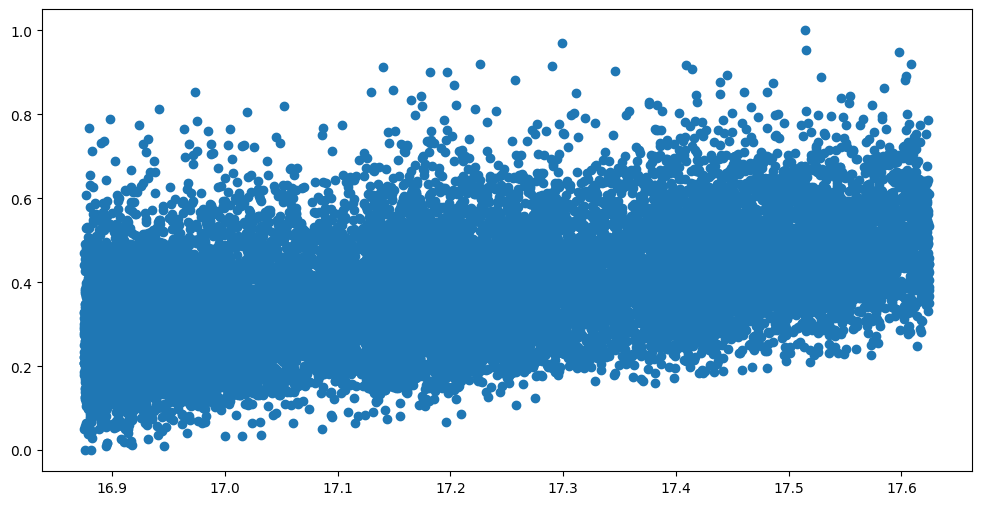

In [ ]:
plt.scatter(df_x1_train,df_y_train)

In [ ]:
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit.library import EfficientSU2

# construct simple feature map
param_x1 = Parameter("x")
#param_x2 = Parameter("x2")
#param_x3 = Parameter("x3")

#feature_map = ZFeatureMap(1, reps=1)

feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x1, 0)
#feature_map.ry(param_x2, 1)
#feature_map.ry(param_x3, 2)

# construct simple ansatz

#ansatz = EfficientSU2(1, reps=1)

param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)


# construct a circuit
qc = QuantumCircuit(1)
qc.barrier()
qc.compose(feature_map, inplace=True)
qc.barrier()
qc.compose(ansatz, inplace=True)

# construct QNN
regression_estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

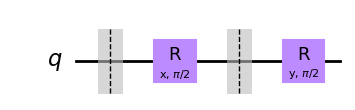

In [ ]:
qc.draw(output="mpl")
qc.decompose().draw(output="mpl", fold=20)

In [ ]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=2),
    callback=callback_graph,
)

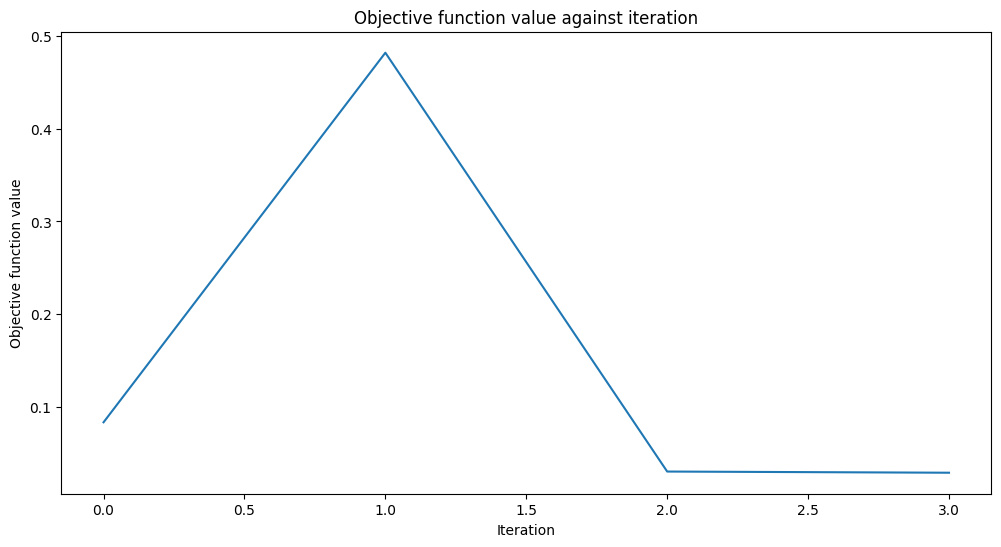

-0.6730951669028362

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(df_x1_train, df_y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(df_x1_train, df_y_train)

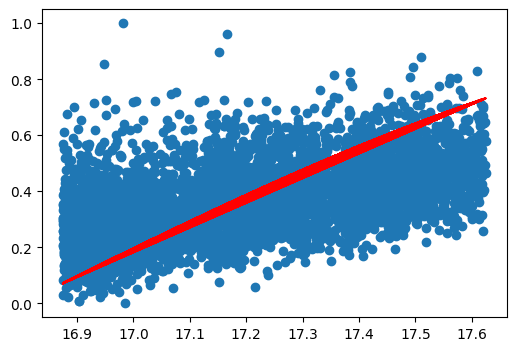

In [ ]:
# plot data
plt.scatter(df_x1_test, df_y_test)
#regressor entrenado con 1 qubit y 10 iters
# plot fitted line
y_ = regressor.predict(df_x1_test)
plt.plot(df_x1_test, y_, "r-")
plt.show()

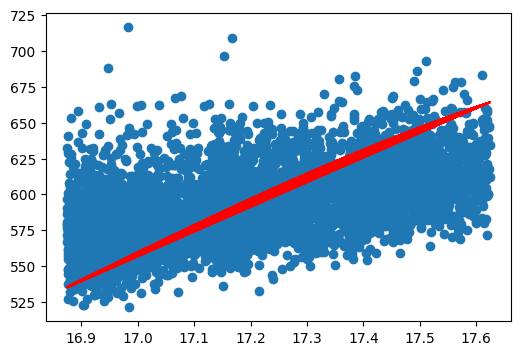

In [ ]:

original_values = scaler.inverse_transform(df_y_test)

plt.scatter(df_x1_test, original_values)

# plot fitted line
y_ = regressor.predict(df_x1_test)
plt.plot(df_x1_test, scaler.inverse_transform(y_), "r-")
plt.show()

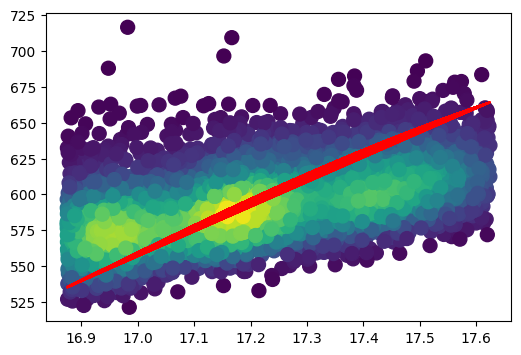

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([df_x1_test.reshape(len(df_x1_test),),df_y_test.reshape(len(df_y_test),)])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(df_x1_test, scaler.inverse_transform(df_y_test), c=z, s=100)
plt.plot(df_x1_test, scaler.inverse_transform(y_), "r-")
plt.show()

In [ ]:
regressor.score(df_x1_test, df_y_test)

-0.6046998348909824

In [ ]:
regressor.score(df_x1_train, df_y_train)

-0.6730951669028362

### Considerando 1 variable y df limpio

Para que el modelo funcione los datos predictores deben estar en formato array, con dimensiones (n, 1) y la variable objetivo debe estar normalizada, en formato array y

In [ ]:
dfc_x1_train, dfc_x1_test, dfc_y_train, dfc_y_test = train_test_split(dfc_x1, dfc_y, test_size = 0.2, random_state= 42)

In [ ]:
dfc_x1_train = np.array(dfc_x1_train)
dfc_x1_train = dfc_x1_train.reshape(len(dfc_x1_train), 1)
dfc_y_train = np.array(dfc_y_train)
scaler = MinMaxScaler()
#df_y_train = scaler.fit_transform(df_y_train)
#df_y_train
dfc_y_train = scaler.fit_transform(dfc_y_train.reshape(-1,1))

In [ ]:
dfc_x1_test = np.array(dfc_x1_test)
dfc_x1_test = dfc_x1_test.reshape(len(dfc_x1_test), 1)
dfc_y_test = np.array(dfc_y_test)
#df_y_train = scaler.fit_transform(df_y_train)
#df_y_train
dfc_y_test = scaler.fit_transform(dfc_y_test.reshape(-1,1))

In [ ]:
regressor2 = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=10),
    callback=callback_graph,
)

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor2.fit(dfc_x1_train, dfc_y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor2.score(dfc_x1_train, dfc_y_train)

In [ ]:
# plot data
plt.scatter(dfc_x1_test, dfc_y_test)

# plot fitted line
y_ = regressor2.predict(dfc_x1_test)
plt.plot(dfc_x1_test, y_, "r-")
plt.title("Grafica de dispersion para el modelo 1 de 1 qubit" )
plt.xlabel("lgE")
plt.ylabel("Xmax normalizado")
plt.show()

In [ ]:

original_values = scaler.inverse_transform(dfc_y_test)

plt.scatter(dfc_x1_test, original_values)

# plot fitted line
y_ = regressor2.predict(dfc_x1_test)
plt.plot(dfc_x1_test, scaler.inverse_transform(y_), "r-")
plt.show()

In [ ]:
# Calculate the point density
xy = np.vstack([df_x1_test.reshape(len(dfc_x1_test),),df_y_test.reshape(len(dfc_y_test),)])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(dfc_x1_test, scaler.inverse_transform(dfc_y_test), c=z, s=100)
plt.plot(dfc_x1_test, scaler.inverse_transform(y_), "r-")
plt.show()

#### intento con 1 qubit, df limpio y funciones definidas de Feature map y Ansatz

In [ ]:
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit.library import EfficientSU2

feature_map2 = ZFeatureMap(1,reps=1)
ansatz2 = EfficientSU2(1,reps=2)
# construct a circuit
qc = QuantumCircuit(1)
qc.barrier()
qc.compose(feature_map2, inplace=True)
qc.barrier()
qc.compose(ansatz2, inplace=True)

# construct QNN
regression_estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map2.parameters, weight_params=ansatz2.parameters
)

In [ ]:
qc.draw(output="mpl")
qc.decompose().draw(output="mpl", fold=20)

In [ ]:
# construct the regressor from the neural network
regressor3 = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=10),
    callback=callback_graph,
)

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor3.fit(dfc_x1_train, dfc_y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor3.score(dfc_x1_train, dfc_y_train)

In [ ]:
original_values = scaler.inverse_transform(dfc_y_test)

plt.scatter(dfc_x1_test, original_values)

# plot fitted line
y_ = regressor.predict(dfc_x1_test)
plt.plot(dfc_x1_test, scaler.inverse_transform(y_), "r-")
plt.title("Grafica de dispersion para el modelo 2 de 1 qubit" )
plt.xlabel("lgE")
plt.ylabel("Xmax normalizado")
plt.show()

In [ ]:
plt.scatter(scaler.inverse_transform(y_), scaler.inverse_transform(dfc_y_test))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([dfc_x1_test.reshape(len(dfc_x1_test),),dfc_y_test.reshape(len(dfc_y_test),)])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(dfc_x1_test, scaler.inverse_transform(dfc_y_test), c=z, s=100)
plt.plot(dfc_x1_test, scaler.inverse_transform(y_), "r-")
plt.show()

Los intentos con todas las variables normalizadas fallaron rotundamente. Las unicas aceptables son aquellas donde solo se normalizan los datos de salida.

### Considerando 3 variables

#### Con solo 3 rotaciones  

In [ ]:
df_x3 = df_conc[["lgE", 'Nmax', "p3"]]
df_y = df_conc["Xmax"]
df_x3

In [ ]:
df_x3_train, df_x3_test, df_y_train, df_y_test = train_test_split(df_x3, df_y, test_size = 0.2, random_state= 42)

In [ ]:
df_x3_train = np.array(df_x3_train)
#df_x3_train = df_x3_train.reshape(len(df_x3_train), 1)
df_y_train = np.array(df_y_train)

scaler = MinMaxScaler()
df_y_train = scaler.fit_transform(df_y_train.reshape(-1,1))

df_x3_test = np.array(df_x3_test)
#df_x3_test = df_x3_test.reshape(len(df_x3_test)*3, 1)
df_y_test = np.array(df_y_test)

#scaler = MinMaxScaler()
df_y_test = scaler.fit_transform(df_y_test.reshape(-1,1))

In [ ]:
from qiskit_machine_learning.neural_networks import SamplerQNN


# construct simple feature map
param_x1 = Parameter("x")
param_x2 = Parameter("x2")
param_x3 = Parameter("x3")

feature_map3 = QuantumCircuit(3, name="fm")
feature_map3.ry(param_x1, 0)
feature_map3.ry(param_x2, 1)
feature_map3.ry(param_x3, 2)

# construct simple ansatz
param_y1 = Parameter("y1")
param_y2 = Parameter("y2")
param_y3 = Parameter("y3")


ansatz3 = QuantumCircuit(3, name="vf")
ansatz3.ry(param_y1, 0)
ansatz3.ry(param_y2, 1)
ansatz3.ry(param_y3, 2)


# construct a circuit
qc3p = QuantumCircuit(3)
qc3p.barrier()
qc3p.compose(feature_map3, inplace=True)
qc3p.barrier()
qc3p.compose(ansatz3, inplace=True)

# construct QNN
regression_estimator_qnn3p = EstimatorQNN(
    circuit=qc3p, input_params=feature_map3.parameters, weight_params=ansatz3.parameters
)

In [ ]:
qc3p.draw(output = "mpl")
qc3p.decompose().draw(output = "mpl", fold=20)

In [ ]:
regressor_3q_params = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn3p,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=2),
    callback=callback_graph,
)

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor_3q_params.fit(df_x3_train, df_y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor_3q_params.score(df_x3_train, df_y_train)

In [ ]:
regressor_3q_params.score(df_x3_test, df_y_test)


#### usando funciones definidas para FeatureMap y Ansatz con 3 columnas del df

In [ ]:
# construct simple feature map
feature_map_d = ZFeatureMap(feature_dimension=3,reps=1)

ansatz_d = EfficientSU2(num_qubits=3, reps=1)
# construct a circuit

qc3 = QuantumCircuit(3)
qc3.barrier()
qc3.compose(feature_map_d, inplace=True)
qc3.barrier()
qc3.compose(ansatz_d, inplace=True)

# construct QNN
regression_estimator_qnn3d = EstimatorQNN(
    circuit=qc3, input_params=feature_map_d.parameters, weight_params=ansatz_d.parameters
)

In [ ]:
qc3.draw(output = "mpl")
qc3.decompose().draw(output = "mpl", fold=20)

In [ ]:
regressor1_3qubits = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn3d,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=2),
    callback=callback_graph,
)

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor1_3qubits.fit(df_x3_train, df_y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor1_3qubits.score(df_x3_train, df_y_train)

In [ ]:
regressor1_3qubits.score(df_x3_test, df_y_test)


In [ ]:
regressor1_3qubits.score(df_x3_train, df_y_train)


##### Intento con PCA

In [ ]:
target_1 = df_conc["Xmax"]
target_1 = np.array(target_1)
target_1 = scaler.fit_transform(target_1.reshape(-1,1))

In [ ]:
pca3_train, pca3_test, y_train, y_test = train_test_split(projected, target_1 , test_size=0.2, random_state=42)

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor1_3qubits.fit(pca3_train, y_train)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor1_3qubits.score(pca3_train, y_train)
regressor1_3qubits.score(pca3_test, y_test)


In [ ]:
regressor1_3qubits.score(pca3_test, y_test)


intento de arbitrary encoding para realizar un circuito de 1 qubit que contenga 3 caracteristicas

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import EfficientSU2
from qiskit.circuit import Parameter
import numpy as np

# Crea un circuito cuántico de un solo qubit
num_qubits = 1
qc = QuantumCircuit(num_qubits)

# Define los parámetros del ansatz EfficientSU2
# Puedes ajustar el número de capas según tus necesidades
num_layers = 2
num_features = 3
params = [Parameter(f'θ_{i}') for i in range(num_features * num_layers * 2)]

# Aplica EfficientSU2 como ansatz
ansatz = EfficientSU2(num_qubits, reps=num_layers, parameter_prefix='θ')
qc.append(ansatz.to_instruction(), range(num_qubits))

# Supongamos que tienes tres características (variables independientes)
# Cada característica se representa con un valor entre 0 y 1
col1_value = 0.7
col2_value = 0.4
col3_value = 0.2

# Escala los valores de las características para usarlos como ángulos
angle1 = col1_value * np.pi
angle2 = col2_value * np.pi
angle3 = col3_value * np.pi

# Aplica compuertas RX con los ángulos calculados
qc.rx(angle1, 0)  # Aplica la compuerta al qubit 0
qc.rx(angle2, 0)  # Aplica la compuerta al qubit 0
qc.rx(angle3, 0)  # Aplica la compuerta al qubit 0

# Transpila el circuito para adaptarlo al backend
qc_transpiled = transpile(qc, optimization_level=3)

# Muestra el circuito
print(qc_transpiled)


## VQR

### Considerando 3 variables PCA

In [ ]:
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit.algorithms.optimizers import COBYLA,SPSA,SLSQP

from IPython.display import clear_output
import time


optimizer = COBYLA(maxiter=2)

from qiskit.primitives import Sampler
sampler = Sampler()


objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


In [ ]:
vqr = VQR(
    feature_map=feature_map_d,
    ansatz=ansatz_d,
    optimizer=L_BFGS_B(maxiter=2),
    callback=callback_graph,
)

In [ ]:
# clear objective value history
objective_func_vals = []
start = time.time()
vqr.fit(pca3_train, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_vqr = vqr.score(pca3_train, y_train)
test_score_vqr = vqr.score(pca3_test, y_test)

print(f"Quantum VQR on the training dataset: {train_score_vqr:.2f}")
print(f"Quantum VQR on the test dataset:     {test_score_vqr:.2f}")

In [ ]:
plt.scatter(vqr.predict(pca3_test), y_test)

### Considerando 1 variable y df limpio

In [ ]:
vqr = VQR(
    feature_map=feature_map2,
    ansatz=ansatz2,
    optimizer=COBYLA(maxiter=2),
    callback=callback_graph,
)

In [ ]:
# clear objective value history
objective_func_vals = []
start = time.time()
vqr.fit(dfc_x1_train, dfc_y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_vqr = vqr.score(dfc_x1_train, dfc_y_train)
test_score_vqr = vqr.score(dfc_x1_test, dfc_y_test)

print(f"Quantum VQR on the training dataset: {train_score_vqr:.2f}")
print(f"Quantum VQR on the test dataset:     {test_score_vqr:.2f}")

## QSVR

In [ ]:
pip install qiskit-aer

In [ ]:
import numpy as np
import pandas as pd
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance
#from qiskit.algorithms import VQR
from qiskit.algorithms.optimizers import COBYLA,SPSA,SLSQP
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supongamos que tienes un DataFrame 'df' con las columnas 'col1', 'col2', 'col3' y 'Xmax'

# Selecciona las características y la variable dependiente
X = np.array(df_conc[['lgE', 'Nmax', 'p3']])
y = np.array(df_conc['Xmax']).reshape(-1,1)

# Escala las características (opcional pero generalmente recomendado)
scaler = StandardScaler()
y = scaler.fit_transform(y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define un FeatureMap cuántico (puedes personalizarlo según tus necesidades)
feature_map = ZZFeatureMap(feature_dimension=3, reps=1)

# Configura un quantum instance
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)

# Configura un optimizador cuántico
optimizer = SLSQP(maxiter=2)

# Crea un modelo VQR (Quantum Variational Regressor)
vqr = VQR(feature_map=feature_map, optimizer=optimizer, quantum_instance=quantum_instance)

# Entrena el modelo VQR
vqr.fit(X_train, y_train)

# Realiza predicciones con el modelo VQR
y_pred_quantum = vqr.predict(X_test)

# Entrena un modelo de regresión lineal clásico como comparación
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Realiza predicciones con el modelo de regresión lineal
y_pred_classical = regressor.predict(X_test)

# Calcula métricas de rendimiento para ambos modelos
mse_quantum = mean_squared_error(y_test, y_pred_quantum)
mse_classical = mean_squared_error(y_test, y_pred_classical)

print(f"MSE Quantum Model: {mse_quantum}")
print(f"MSE Classical Linear Regression Model: {mse_classical}")


# Modelos clasicos

## Regresion lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
np.array(predictors).reshape((-1,1))

In [ ]:
X = df_conc['lgE'].values.reshape(-1, 1)  # Asegúrate de que X sea una matriz 2D.
y = df_conc['Xmax']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# Crea un modelo de regresión lineal.
modelo = LinearRegression()

# Ajusta el modelo a tus datos.
modelo.fit(X_train, y_train)

# Realiza predicciones utilizando el modelo entrenado.
y_pred = modelo.predict(X_test)

# Imprime los coeficientes de la regresión lineal.
print("Coeficiente de pendiente (m):", modelo.coef_[0])
print("Término independiente (b):", modelo.intercept_)


In [ ]:
plt.plot(X_test,y_pred, color = "b")
plt.scatter(X_test,y_test, color ="r")
plt.show()
modelo.score(X_test,y_test)

## Regresion multiple

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que tienes un DataFrame 'df' con tres columnas independientes 'col1', 'col2', 'col3' y una columna dependiente 'target'.

# Selecciona las características y la variable dependiente
X = df_conc[['lgE', 'Nmax', 'p3']]
y = df_conc['Xmax']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modelo de regresión lineal
regressor = LinearRegression()

# Entrena el modelo con los datos de entrenamiento
regressor.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Calcula métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

# Coeficientes y término independiente del modelo
print("Coeficientes del modelo:")
print(regressor.coef_)
print("Término independiente:")
print(regressor.intercept_)


In [ ]:
plt.scatter(regressor.predict(X_test), y_test)